In [1]:
%pip install pandas

import pandas as pd

data_train = pd.read_csv('D:\work\AI-EngineeringBootcamp\emotions_data\emotion-labels-train.csv')
data_test = pd.read_csv('D:\work\AI-EngineeringBootcamp\emotions_data\emotion-labels-test.csv')
data_val = pd.read_csv('D:\work\AI-EngineeringBootcamp\emotions_data\emotion-labels-val.csv')

<>:5: SyntaxWarning: invalid escape sequence '\w'
<>:6: SyntaxWarning: invalid escape sequence '\w'
<>:7: SyntaxWarning: invalid escape sequence '\w'
<>:5: SyntaxWarning: invalid escape sequence '\w'
<>:6: SyntaxWarning: invalid escape sequence '\w'
<>:7: SyntaxWarning: invalid escape sequence '\w'
C:\Users\istoleru\AppData\Local\Temp\ipykernel_35712\1798842737.py:5: SyntaxWarning: invalid escape sequence '\w'
  data_train = pd.read_csv('D:\work\AI-EngineeringBootcamp\emotions_data\emotion-labels-train.csv')
C:\Users\istoleru\AppData\Local\Temp\ipykernel_35712\1798842737.py:6: SyntaxWarning: invalid escape sequence '\w'
  data_test = pd.read_csv('D:\work\AI-EngineeringBootcamp\emotions_data\emotion-labels-test.csv')
C:\Users\istoleru\AppData\Local\Temp\ipykernel_35712\1798842737.py:7: SyntaxWarning: invalid escape sequence '\w'
  data_val = pd.read_csv('D:\work\AI-EngineeringBootcamp\emotions_data\emotion-labels-val.csv')


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
print(data_train.head())

                                                text label
0  Just got back from seeing @GaryDelaney in Burs...   joy
1  Oh dear an evening of absolute hilarity I don'...   joy
2  Been waiting all week for this game ❤️❤️❤️ #ch...   joy
3  @gardiner_love : Thank you so much, Gloria! Yo...   joy
4  I feel so blessed to work with the family that...   joy


In [3]:
%pip install clean-text
%pip install scikit-learn
%pip install datasets
%pip install evaluate

import pandas as pd
import numpy as np
import re
from transformers import XLNetTokenizer, XLNetForSequenceClassification, TrainingArguments, Trainer, pipeline
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from cleantext import clean
import datasets 
import evaluate
import random

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
data = pd.concat([data_train, data_test, data_val], ignore_index=True)


In [5]:
data.head()

,text,label
0,Just got back from seeing @GaryDelaney in Burs...,joy
1,Oh dear an evening of absolute hilarity I don'...,joy
2,Been waiting all week for this game ❤️❤️❤️ #ch...,joy
3,"@gardiner_love : Thank you so much, Gloria! Yo...",joy
4,I feel so blessed to work with the family that...,joy


In [6]:
data.columns

Index(['text', 'label'], dtype='object')

In [7]:
data['text_clean'] = data['text'].apply(lambda x: clean(x))

In [8]:
data.head()

,text,label,text_clean
0,Just got back from seeing @GaryDelaney in Burs...,joy,just got back from seeing @garydelaney in burs...
1,Oh dear an evening of absolute hilarity I don'...,joy,oh dear an evening of absolute hilarity i don'...
2,Been waiting all week for this game ❤️❤️❤️ #ch...,joy,been waiting all week for this game ❤️❤️❤️ #ch...
3,"@gardiner_love : Thank you so much, Gloria! Yo...",joy,"@gardiner_love : thank you so much, gloria! yo..."
4,I feel so blessed to work with the family that...,joy,i feel so blessed to work with the family that...


In [9]:
import emoji
data['text_clean_no_emoji'] = data['text_clean'].apply(lambda x: emoji.replace_emoji(x, replace=""))

In [10]:
data['text_clean_no_emoji'].head()

0    just got back from seeing @garydelaney in burs...
1    oh dear an evening of absolute hilarity i don'...
2    been waiting all week for this game  #cheer #f...
3    @gardiner_love : thank you so much, gloria! yo...
4    i feel so blessed to work with the family that...
Name: text_clean_no_emoji, dtype: object

In [11]:
data['text_clean_no_emoji'] = data['text_clean_no_emoji'].apply(lambda x: re.sub('@[^\s]+', '', x))

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\istoleru\AppData\Local\Temp\ipykernel_35712\1712508267.py:1: SyntaxWarning: invalid escape sequence '\s'
  data['text_clean_no_emoji'] = data['text_clean_no_emoji'].apply(lambda x: re.sub('@[^\s]+', '', x))


In [12]:
data.head(20)

,text,label,text_clean,text_clean_no_emoji
0,Just got back from seeing @GaryDelaney in Burs...,joy,just got back from seeing @garydelaney in burs...,just got back from seeing in burslem. amazing...
1,Oh dear an evening of absolute hilarity I don'...,joy,oh dear an evening of absolute hilarity i don'...,oh dear an evening of absolute hilarity i don'...
2,Been waiting all week for this game ❤️❤️❤️ #ch...,joy,been waiting all week for this game ❤️❤️❤️ #ch...,been waiting all week for this game #cheer #f...
3,"@gardiner_love : Thank you so much, Gloria! Yo...",joy,"@gardiner_love : thank you so much, gloria! yo...",": thank you so much, gloria! you're so sweet,..."
4,I feel so blessed to work with the family that...,joy,i feel so blessed to work with the family that...,i feel so blessed to work with the family that...
5,"Today I reached 1000 subscribers on YT!! , #go...",joy,"today i reached 1000 subscribers on yt!! , #go...","today i reached 1000 subscribers on yt!! , #go..."
6,"@Singaholic121 Good morning, love! Happy first...",joy,"@singaholic121 good morning, love! happy first...","good morning, love! happy first day of fall. ..."
7,#BridgetJonesBaby is the best thing I've seen ...,joy,#bridgetjonesbaby is the best thing i've seen ...,#bridgetjonesbaby is the best thing i've seen ...
8,Just got back from seeing @GaryDelaney in Burs...,joy,just got back from seeing @garydelaney in burs...,just got back from seeing in burslem. amazing...
9,@IndyMN I thought the holidays could not get a...,joy,@indymn i thought the holidays could not get a...,i thought the holidays could not get any more...


<Axes: xlabel='label'>

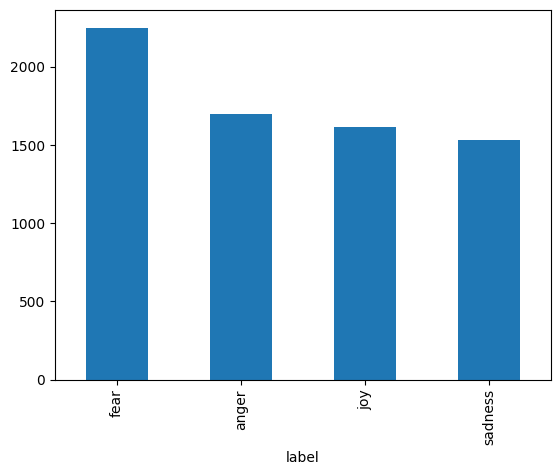

In [13]:
data['label'].value_counts().plot(kind='bar')


C:\Users\istoleru\AppData\Local\Temp\ipykernel_35712\1942065690.py:3: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min())).reset_index(drop=True))


<Axes: xlabel='label'>

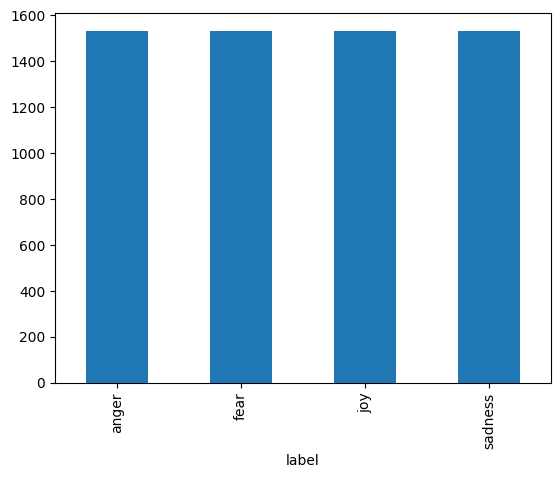

In [14]:
g = data.groupby('label')
g.size().min()
data = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min())).reset_index(drop=True))

data['label'].value_counts().plot(kind='bar')

In [15]:

data['label_int'] = LabelEncoder().fit_transform(data['label'])

data.head()

NUM_LABELS = len(data['label_int'].unique())

print(NUM_LABELS)

4


In [16]:
train_split, test_split = train_test_split(data, test_size=0.2, random_state=42, stratify=data['label_int'])
train_split, val_split = train_test_split(train_split, test_size=0.1, random_state=42, stratify=train_split['label_int'])

In [17]:
print(len(train_split), len(val_split), len(test_split))

4414 491 1227


In [18]:
train_df = pd.DataFrame({
    "label": train_split['label_int'],
    "text": train_split['text_clean_no_emoji']
})

train_df.head()


,label,text
3307,2,top seed johnson chases double delight at tour...
1023,0,i played a game where john elway was sacked ...
48,0,"im on holiday for the next round, fuming!"
3120,2,- felt like he couldn't control -- and here s...
705,0,i can see how this will end\nin all its bitter...


In [19]:
test_df = pd.DataFrame({
    "label": test_split['label_int'],
    "text": test_split['text_clean_no_emoji']
})

test_df.head()


,label,text
4688,3,do we think the swallows and swifts have gone...
4609,3,honestly. all i care about is selasi not mess...
1059,0,i guess #bradangelina > #anger > #blacklivesma...
5042,3,why is this evil corrupt fuck still knocking ...
5886,3,i don't think i can go to work tomorrow since ...


In [20]:
train_df = datasets.Dataset.from_dict(train_df)
test_df = datasets.Dataset.from_dict(test_df)

In [21]:
data_dict = datasets.DatasetDict({"train": train_df, "test": test_df})

In [22]:
data_dict

DatasetDict({
    train: Dataset({
        features: ['label', 'text'],
        num_rows: 4414
    })
    test: Dataset({
        features: ['label', 'text'],
        num_rows: 1227
    })
})

In [23]:
%pip install sentencepiece


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
tokenizer = XLNetTokenizer.from_pretrained('xlnet-base-cased',use_fast=True)


In [25]:
def tokenize_function(examples):
    return tokenizer(examples['text'], padding='max_length', max_length=128, truncation=True)


In [26]:
tokenized_datasets = data_dict.map(tokenize_function, batched=True)

Map:   0%|          | 0/4414 [00:00<?, ? examples/s]

Map:   0%|          | 0/1227 [00:00<?, ? examples/s]

In [27]:
print(tokenized_datasets['train']['text'][0])

top seed johnson chases double delight at tour championship


In [28]:
print(tokenized_datasets['train']['input_ids'][0])

[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 310, 4291, 17, 22116, 672, 9751, 23, 1620, 11404, 38, 1547, 2892, 4, 3]


In [29]:
print(tokenizer.decode(5))

<pad>


In [30]:
print(tokenized_datasets['train']['token_type_ids'][0])

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2]


In [31]:
print(tokenized_datasets['train']['attention_mask'][0])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [32]:
small_train_dataset = tokenized_datasets['train'].shuffle(seed=42).select(range(100))
small_test_dataset = tokenized_datasets['test'].shuffle(seed=42).select(range(100))

In [33]:
model = XLNetForSequenceClassification.from_pretrained('xlnet-base-cased', num_labels=NUM_LABELS, id2label={0: 'anger', 1: 'fear', 2: 'joy', 3: 'sadness'})

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


pytorch_model.bin:   0%|          | 0.00/467M [00:00<?, ?B/s]

c:\Users\istoleru\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\istoleru\.cache\huggingface\hub\models--xlnet-base-cased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Some weights of XLNetForSequenceClassification were not initialized from the model checkpoin

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


In [34]:
metric = evaluate.load('accuracy')

In [35]:
def compute_metrics(eval_pred): 
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [36]:
%pip install -U "accelerate>=0.26.0" transformers[torch]

model.safetensors:   0%|          | 0.00/467M [00:00<?, ?B/s]

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
training_args = TrainingArguments(
    output_dir='./results',
    eval_strategy='epoch',
    learning_rate=2e-5,
    num_train_epochs=3,
)

In [38]:
trainer = Trainer(model = model,
                args = training_args,
                train_dataset = small_train_dataset,
                eval_dataset = small_test_dataset,
                compute_metrics = compute_metrics)
trainer.train()


c:\Users\istoleru\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\utils\data\dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,1.395468,0.280000
2,No log,1.358717,0.300000
3,No log,1.354589,0.280000


c:\Users\istoleru\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\utils\data\dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
c:\Users\istoleru\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\utils\data\dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
c:\Users\istoleru\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\utils\data\dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


TrainOutput(global_step=39, training_loss=1.3962806310409155, metrics={'train_runtime': 111.3789, 'train_samples_per_second': 2.694, 'train_steps_per_second': 0.35, 'total_flos': 21366375321600.0, 'train_loss': 1.3962806310409155, 'epoch': 3.0})

In [39]:
trainer.evaluate()

c:\Users\istoleru\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\utils\data\dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


{'eval_loss': 1.3545887470245361,
 'eval_accuracy': 0.28,
 'eval_runtime': 6.1478,
 'eval_samples_per_second': 16.266,
 'eval_steps_per_second': 2.115,
 'epoch': 3.0}

In [40]:
model.save_pretrained("fine_tuned_model")


In [41]:
fine_tuned_model = XLNetForSequenceClassification.from_pretrained("fine_tuned_model")

In [42]:
clf = pipeline('text-classification', model=fine_tuned_model, tokenizer=tokenizer)

Device set to use cpu


In [50]:
print(val_split['text'][94])


I told myself i wouldn't talk about this but i need to bring it up. I'm slightly bitter about the tøp cover of cancer


In [51]:
answer = clf(val_split['text'][94])

print(answer)

[{'label': 'anger', 'score': 0.360005646944046}]
